In [43]:
from kervis.utils import Model
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [44]:
kernel = Graphlet()
model = Model(kernel, "SVM", "MUTAG")

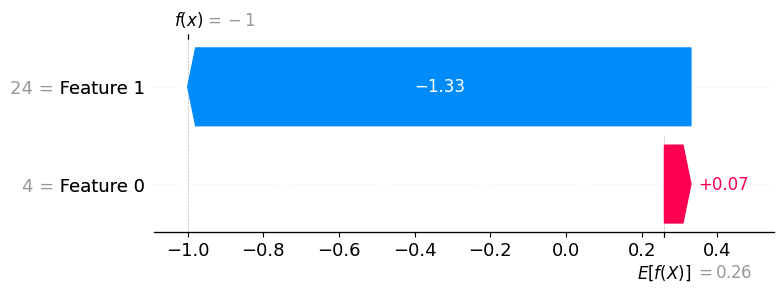

In [48]:
model.waterfall_plot(0)

In [49]:
model.find_features(0, 1)

[(1, 2, 3, 4),
 (1, 2, 3, 6),
 (1, 2, 5, 6),
 (1, 4, 5, 6),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 10),
 (3, 4, 5, 6),
 (3, 4, 5, 7),
 (3, 4, 9, 10),
 (3, 4, 10, 11),
 (4, 5, 6, 10),
 (4, 5, 7, 8),
 (4, 5, 7, 10),
 (4, 5, 9, 10),
 (4, 5, 10, 11),
 (4, 8, 9, 10),
 (4, 9, 10, 14),
 (4, 10, 11, 12),
 (5, 6, 7, 8),
 (5, 7, 8, 9),
 (7, 8, 9, 10),
 (7, 8, 9, 14),
 (8, 9, 10, 11),
 (8, 9, 13, 14),
 (9, 10, 11, 12),
 (9, 10, 11, 14),
 (9, 10, 13, 14),
 (9, 12, 13, 14),
 (9, 13, 14, 15),
 (10, 11, 12, 13),
 (11, 12, 13, 14),
 (11, 12, 13, 15),
 (12, 13, 15, 16),
 (12, 13, 15, 17),
 (13, 14, 15, 16),
 (13, 14, 15, 17)]

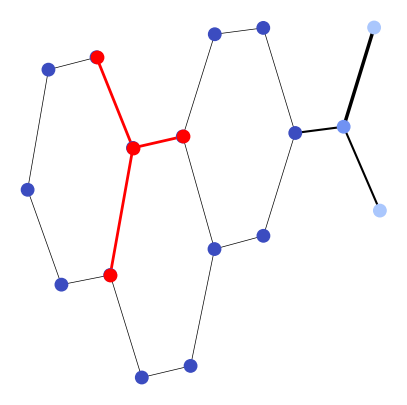

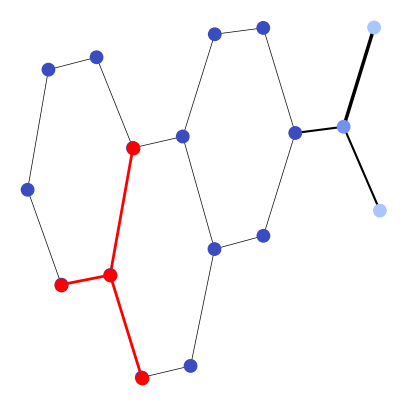

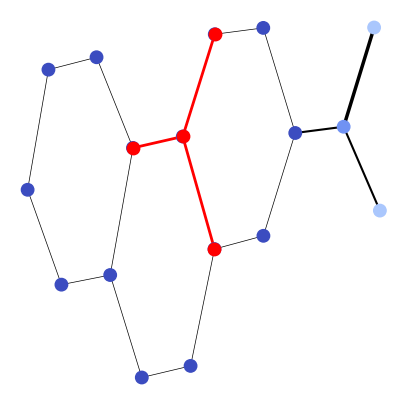

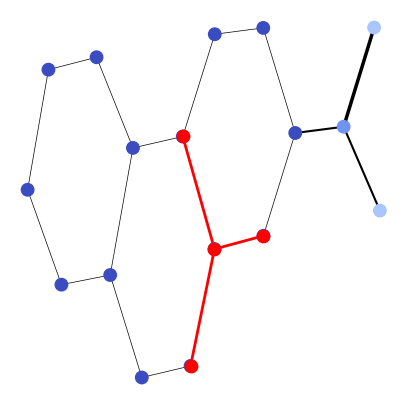

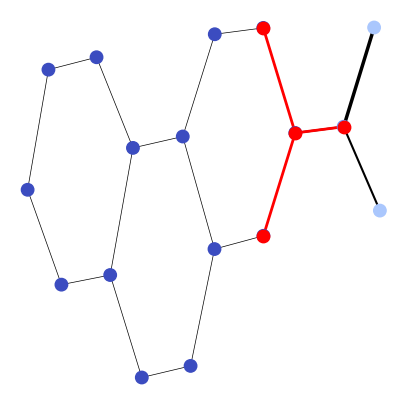

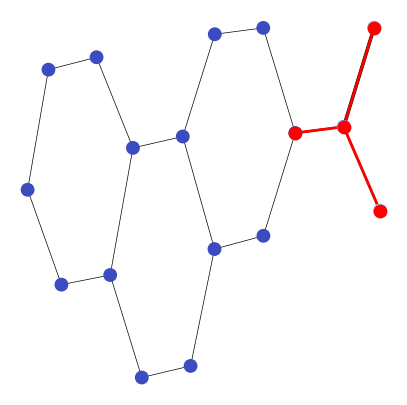

In [51]:
model.highlight_features(0, 0)